<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Python/Classification/DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From titanic.csv predict if a given person survived or not using Decision Trees.

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(200804)

#Data preparation

In [3]:
titanic_dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [6]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#columns in lowercase
titanic_dataset.rename(columns={ col: col.lower() for col in titanic_dataset.columns}, inplace = True )

In [31]:
titanic_dataset.dropna(inplace=True)

In [32]:
titanic_dataset.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [34]:
#masks for sex columns
titanic_dataset.sex.mask(titanic_dataset.sex == 'female', '1', inplace=True)
titanic_dataset.sex.mask(titanic_dataset.sex == 'male', '0', inplace=True)
titanic_dataset.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [35]:
#independent and dependent variables 
X = titanic_dataset[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_dataset[['survived']]

# Dataset split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, test_size=0.3)
print('training data shape: ', X_train.shape, y_train.shape)
print('testing data shape', X_test.shape, y_test.shape)

training data shape:  (128, 6) (128, 1)
testing data shape (55, 6) (55, 1)


#Model Training

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

In [38]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, random_state=123)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [39]:
#features importance
#features that provide more information
dt.feature_importances_

array([0.        , 0.44032504, 0.38683736, 0.03522875, 0.        ,
       0.13760884])

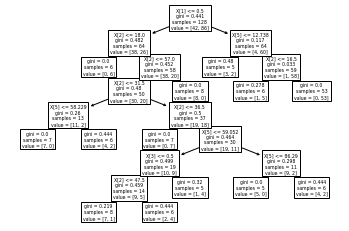

In [41]:
plt.clf()
plot_tree(dt)
plt.show()

In [44]:
#check built rules
from sklearn.tree import export_text
decisions = export_text(dt, feature_names=list(X.columns.values))
print(decisions)

|--- sex <= 0.50
|   |--- age <= 18.00
|   |   |--- class: 1
|   |--- age >  18.00
|   |   |--- age <= 57.00
|   |   |   |--- age <= 31.50
|   |   |   |   |--- fare <= 58.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  58.23
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  31.50
|   |   |   |   |--- age <= 36.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  36.50
|   |   |   |   |   |--- fare <= 59.05
|   |   |   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |   |   |--- age <= 47.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  47.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fare >  59.05
|   |   |   |   |   |   |--- fare <= 86.29
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fare >  86.29
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- age >  57.00
|   |

#Performance Metrics

In [47]:
# prediction labels
prediction_labels = dt.predict(X_test)
prediction_labels[:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [49]:
# prediction score
prediction_scores = dt.predict_proba(X_test)
prediction_scores[:10]
#returns a lists list where the first element from inner list is the probability for negative label and the second element is the probability for positive label

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ]])

In [50]:
#First element es for negative tag and second for positive label
dt.classes_

array([0, 1])

**Accuraccy**

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy = accuracy_score(y_test,prediction_labels)
accuracy

0.5818181818181818

**ROC y AUC**

Text(0, 0.5, 'tpr')

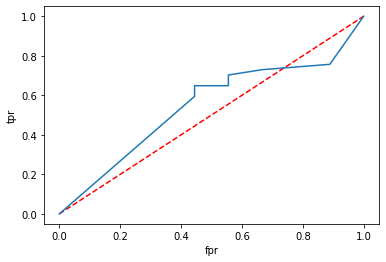

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
positive_tag_proba = prediction_scores[:,1]
auc = roc_auc_score(y_test, positive_tag_proba)

fpr, tpr, threshold_roc = roc_curve(y_test, positive_tag_proba, pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c='red')
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

**Confusion Matrix**

[0,0] True Negatives

[0,1] False Positives

[1,0] False Negatives

[1,1] True Positives

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction_labels)

array([[ 8, 10],
       [13, 24]])

**Precision, recall and F1 Score**

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
precision_score(y_test, prediction_labels)

0.7058823529411765

In [64]:
recall_score(y_test, prediction_labels)

0.6486486486486487

In [66]:
f1_score(y_test, prediction_labels)

0.676056338028169

#GridSearchCV for CrossValidation

In [70]:
#Gridsearch cv for defining k-folds and more than one hyperparameters
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
grid = {'min_samples_leaf': [3,5,7,11], 'criterion': ['gini', 'entropy']}
#scoring what metric uses for best model selection
#cv how many kfolds
#n_jobs = -1 run models in parallel
#return_train_score returns training score
gs = GridSearchCV(dt, param_grid=grid, scoring='precision', cv=10, n_jobs=-1, return_train_score=True)

gs.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [72]:
#best model
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
predicted_labels = gs.predict(X_test)
predicted_labels[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [75]:
predicted_scores = gs.predict_proba(X_test)
prediction_scores[:10]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ]])

#Performance Metrics fro GridSearchCV

**Accuracy**

In [77]:
accuracy = accuracy_score(y_test,predicted_labels)
accuracy

0.6

**ROC y AUC**

Text(0, 0.5, 'tpr')

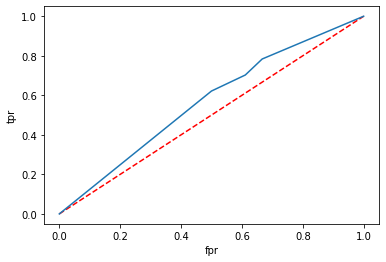

In [79]:
positive_tag_proba = predicted_scores[:,1]
auc = roc_auc_score(y_test, positive_tag_proba)

fpr, tpr, threshold_roc = roc_curve(y_test, positive_tag_proba, pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c='red')
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

**Confusion Matrix**

In [80]:
confusion_matrix(y_test,prediction_labels)

array([[ 8, 10],
       [13, 24]])

**Precision, recall and F1 Score**

In [81]:
precision_score(y_test, predicted_labels)

0.7027027027027027

In [82]:
recall_score(y_test, predicted_labels)

0.7027027027027027

In [83]:
f1_score(y_test, predicted_labels)

0.7027027027027027